<br><font color = "#CC3D3D">
## Ensemble Learning ##

#### Data Preparation

In [9]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, random_state=0)

<font color = "#CC3D3D">
### Ensemble with different models

### Voting ensemble

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [12]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
voting = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'hard')
# hard -> voting, soft -> averaging
# soft 방법이 일반적인 보팅방법

In [13]:
from sklearn.metrics import accuracy_score
for clf in (logreg, tree, knn, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

LogisticRegression 0.958041958041958
DecisionTreeClassifier 0.9020979020979021
KNeighborsClassifier 0.9370629370629371
VotingClassifier 0.972027972027972


C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Averaging predictions

In [14]:
averaging = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'soft')
averaging.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth...
                                        

In [15]:
averaging.fit(X_train, y_train).score(X_test, y_test)

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.965034965034965

### Stacking 

In [16]:
!pip install mlxtend

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
svm = SVC()
mlp = MLPClassifier(alpha=1)

In [18]:
from mlxtend.classifier import StackingClassifier
import numpy as np
np.random.seed(1671)

stacking = StackingClassifier(classifiers=[tree, knn, svm, mlp], 
                              meta_classifier=logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

for clf in (tree, knn, svm, mlp, stacking) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

DecisionTreeClassifier 0.9090909090909091
KNeighborsClassifier 0.9370629370629371
SVC 0.6293706293706294


C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MLPClassifier 0.9370629370629371


C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


StackingClassifier 0.9300699300699301


C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Bagging

In [19]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0, n_estimators=200)
bagging.fit(X_train, y_train).score(X_test, y_test)

0.9370629370629371

### Boosting
- AdaBoost(Adaptive Boosting)
- Gradient Boosting

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

0.986013986013986

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.965034965034965

<font color='#CC3D3D'>
### Performance evaluation of ensemble methods

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Fut

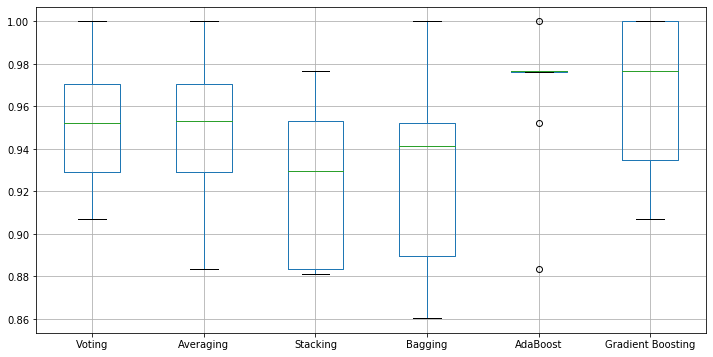

In [22]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Voting','Averaging','Stacking','Bagging','AdaBoost','Gradient Boosting']
models = [voting, averaging, stacking, bagging, ada, gbm]

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=classifiers)
box.T.boxplot()

<br><font color = "#CC3D3D">
# Feature Engineering

* [Handling Missing Values](#Handling-Missing-Values)
* [Handling Categorical Variables](#Handling-Categorical-Variables)
* [Feature Scaling](#Feature-Scaling)
* [Feature Selection](#Feature-Selection)
* [Feature Generation](#Feature-Generation)

In [24]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**[Allstate Purchase Prediction Challenge](https://www.kaggle.com/c/allstate-purchase-prediction-challenge/data)**
- 고객이 자동차 보험상품을 구매하기까지의 transaction 기록 
- 각 customer ID 별로 quote history 포함
- 각 customer ID 별 마지막 행이 구매 포인트 (record_type=1)

In [25]:
data = pd.read_csv('Allstate_train.csv')
data.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [26]:
data[data.customer_ID == 10000000]

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
5,10000000,6,0,0,11:57,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
6,10000000,7,0,0,11:58,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
7,10000000,8,0,0,12:03,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
8,10000000,9,1,0,12:07,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,634


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
customer_ID          665249 non-null int64
shopping_pt          665249 non-null int64
record_type          665249 non-null int64
day                  665249 non-null int64
time                 665249 non-null object
state                665249 non-null object
location             665249 non-null int64
group_size           665249 non-null int64
homeowner            665249 non-null int64
car_age              665249 non-null int64
car_value            663718 non-null object
risk_factor          424831 non-null float64
age_oldest           665249 non-null int64
age_youngest         665249 non-null int64
married_couple       665249 non-null int64
C_previous           646538 non-null float64
duration_previous    646538 non-null float64
A                    665249 non-null int64
B                    665249 non-null int64
C                    665249 non-null int64
D                   

In [28]:
dataP = data.loc[data.record_type == 1].copy()
con = ['group_size','car_age','age_oldest','age_youngest','duration_previous','cost']
cat = ['day','homeowner','car_value','risk_factor','married_couple','C_previous','state', 'location','shopping_pt']

***
## Handling Missing Values

##### Check missing values

In [31]:
dataP.isnull().sum()

customer_ID              0
shopping_pt              0
record_type              0
day                      0
time                     0
state                    0
location                 0
group_size               0
homeowner                0
car_age                  0
car_value                0
risk_factor          34346
age_oldest               0
age_youngest             0
married_couple           0
C_previous             836
duration_previous      836
A                        0
B                        0
C                        0
D                        0
E                        0
F                        0
G                        0
cost                     0
dtype: int64

### 1. Drop

In [32]:
dataP.shape

(97009, 25)

In [33]:
dataP_drop = dataP.dropna(subset=['risk_factor','C_previous','duration_previous'])
dataP_drop.shape

(62255, 25)

In [34]:
dataP_drop.isnull().sum()

customer_ID          0
shopping_pt          0
record_type          0
day                  0
time                 0
state                0
location             0
group_size           0
homeowner            0
car_age              0
car_value            0
risk_factor          0
age_oldest           0
age_youngest         0
married_couple       0
C_previous           0
duration_previous    0
A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
G                    0
cost                 0
dtype: int64

### 2. Impute

##### Continuous feature의 결측값 대체

In [35]:
dataP[con].dtypes

group_size             int64
car_age                int64
age_oldest             int64
age_youngest           int64
duration_previous    float64
cost                   int64
dtype: object

In [36]:
from sklearn.preprocessing import Imputer
imputer_con = Imputer(strategy="median")  
imputer_con.fit(dataP[con])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

<div class="alert alert-block alert-warning">
- strategy="mean": 평균 대체

- strategy="median": 중위수 대체
- strategy="most_frequent":최빈값 대체


In [37]:
x = imputer_con.transform(dataP[con]); x
# 넘파이로 변환됨. 수치형으로 바뀜.그러므로 범주형은 쓸수 없슴.

array([[  2.,   2.,  46.,  42.,   2., 634.],
       [  1.,  10.,  28.,  28.,  13., 731.],
       [  1.,  11.,  43.,  43.,   4., 602.],
       ...,
       [  1.,   8.,  23.,  23.,   5., 716.],
       [  1.,   0.,  39.,  39.,   7., 651.],
       [  1.,   1.,  20.,  20.,   4., 681.]])

In [39]:
dataP_imp = dataP.copy()
dataP_imp[con] = x
dataP_imp.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
8,10000000,9,1,0,12:07,IN,10001,2.0,0,2.0,...,1.0,2.0,1,0,2,2,1,2,1,634.0
14,10000005,6,1,3,09:09,NY,10006,1.0,0,10.0,...,3.0,13.0,0,0,3,2,0,0,2,731.0
22,10000007,8,1,4,14:26,PA,10008,1.0,0,11.0,...,2.0,4.0,0,0,1,2,0,0,1,602.0
26,10000013,4,1,4,09:31,WV,10014,2.0,1,3.0,...,3.0,3.0,1,1,3,2,1,1,3,626.0
32,10000014,6,1,1,17:50,MO,10015,1.0,0,5.0,...,1.0,2.0,1,1,1,1,0,2,2,614.0


<font color='red'>
- sklearn.preprocessing.Imputer 클래스는 사이킷런 0.22 버전에서 삭제되기 때문에
- 0.20 버전에서 추가된 sklearn.impute.SimpleImputer 클래스를 사용해야 함.

##### Categorical feature 의 결측값 대체

In [40]:
dataP_imp[cat].dtypes

day                 int64
homeowner           int64
car_value          object
risk_factor       float64
married_couple      int64
C_previous        float64
state              object
location            int64
shopping_pt         int64
dtype: object

In [41]:
obj=['car_value','state'] 
print(dataP['car_value'].astype('category').cat.categories)
print(dataP['state'].astype('category').cat.categories)

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], dtype='object')
Index(['AL', 'AR', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IN', 'KS',
       'KY', 'MD', 'ME', 'MO', 'MS', 'MT', 'ND', 'NE', 'NH', 'NM', 'NV', 'NY',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SD', 'TN', 'UT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')


In [42]:
dataP[cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97009 entries, 8 to 665248
Data columns (total 9 columns):
day               97009 non-null int64
homeowner         97009 non-null int64
car_value         97009 non-null object
risk_factor       62663 non-null float64
married_couple    97009 non-null int64
C_previous        96173 non-null float64
state             97009 non-null object
location          97009 non-null int64
shopping_pt       97009 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 7.4+ MB


<font color='blue'>
* object type의 feature만 추출

In [46]:
dataP_imp[obj]

,car_value,state
8,6,10
14,4,23
22,2,27
26,3,34
32,3,15
42,3,24
50,3,25
57,5,27
64,3,24
68,3,24


In [46]:
def f(x):
    return x+1

pd.Series([1,2,3]).apply(lambda x: x+1)
#pd.Series([1,2,3]).apply(f)
# lambda : 익명의 함수

0    2
1    3
2    4
dtype: int64

In [44]:
dataP_imp[obj] = dataP_imp[obj].apply(lambda x: x.astype('category').cat.codes) 
# cat.code : 문자가 범주형으로 바뀌면 생기는 코드
# apply : 각각의 값별로 함수를 적용

In [45]:
dataP_imp.dtypes

customer_ID            int64
shopping_pt            int64
record_type            int64
day                    int64
time                  object
state                   int8
location               int64
group_size           float64
homeowner              int64
car_age              float64
car_value               int8
risk_factor          float64
age_oldest           float64
age_youngest         float64
married_couple         int64
C_previous           float64
duration_previous    float64
A                      int64
B                      int64
C                      int64
D                      int64
E                      int64
F                      int64
G                      int64
cost                 float64
dtype: object

<font color='blue'>
* object type을 category type으로 바꾼 후 숫자로 encoding

<font color=green>
(strategy="most_frequent"을 사용하여 impute)

In [47]:
imputer_cat = Imputer(strategy="most_frequent")
dataP_imp[cat] = imputer_cat.fit_transform(dataP_imp[cat])

In [48]:
dataP_imp[cat].head()

,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,location,shopping_pt
8,0.0,0.0,6.0,3.0,1.0,1.0,10.0,10001.0,9.0
14,3.0,0.0,4.0,4.0,0.0,3.0,23.0,10006.0,6.0
22,4.0,0.0,2.0,3.0,0.0,2.0,27.0,10008.0,8.0
26,4.0,1.0,3.0,3.0,1.0,3.0,34.0,10014.0,4.0
32,1.0,0.0,3.0,3.0,1.0,1.0,15.0,10015.0,6.0


<font color='blue'>
- 모든 categorical feature에 대해 결측치를 최빈값으로 대체 후 data frame으로 변환

***
## Handling Categorical Variables

In [49]:
dataP_imp[cat] = dataP_imp[cat].astype(int)

In [50]:
dataP_imp[cat].head()

,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,location,shopping_pt
8,0,0,6,3,1,1,10,10001,9
14,3,0,4,4,0,3,23,10006,6
22,4,0,2,3,0,2,27,10008,8
26,4,1,3,3,1,3,34,10014,4
32,1,0,3,3,1,1,15,10015,6


### 1. One-Hot Encoding

In [51]:
dataP['day']

8         0
14        3
22        4
26        4
32        1
42        3
50        1
57        1
64        0
68        3
74        2
80        6
88        4
95        1
102       0
109       2
120       0
126       1
133       2
142       2
146       4
154       0
158       0
165       2
173       0
182       0
192       3
200       0
203       2
210       4
         ..
665040    4
665048    4
665057    4
665062    0
665070    4
665081    4
665089    4
665093    0
665103    3
665108    2
665116    4
665124    0
665131    4
665141    2
665149    3
665158    4
665162    1
665168    2
665174    1
665180    3
665190    3
665195    4
665204    2
665209    0
665216    2
665225    2
665233    4
665239    4
665242    1
665248    1
Name: day, Length: 97009, dtype: int64

In [52]:
dataP_imp = pd.get_dummies(dataP_imp,columns=['day'])
# get_dummies : 판다스에서 제공하는 메소드, 넘파이로 바뀌면 필드가 안보여서 이것을 많이 쓴다.
# 쪼개기 전에 실행한다. 아니면 학습시 달라질 수 있어 또는 합친후 다시 실행한다.

In [54]:
dataP_imp.head()

,customer_ID,shopping_pt,record_type,time,state,location,group_size,homeowner,car_age,car_value,...,F,G,cost,day_0,day_1,day_2,day_3,day_4,day_5,day_6
8,10000000,9,1,12:07,10,10001,2.0,0,2.0,6,...,2,1,634.0,1,0,0,0,0,0,0
14,10000005,6,1,09:09,23,10006,1.0,0,10.0,4,...,0,2,731.0,0,0,0,1,0,0,0
22,10000007,8,1,14:26,27,10008,1.0,0,11.0,2,...,0,1,602.0,0,0,0,0,1,0,0
26,10000013,4,1,09:31,34,10014,2.0,1,3.0,3,...,1,3,626.0,0,0,0,0,1,0,0
32,10000014,6,1,17:50,15,10015,1.0,0,5.0,3,...,2,2,614.0,0,1,0,0,0,0,0


In [55]:
dataP_imp.filter(like='day').head()

,day_0,day_1,day_2,day_3,day_4,day_5,day_6
8,1,0,0,0,0,0,0
14,0,0,0,1,0,0,0
22,0,0,0,0,1,0,0
26,0,0,0,0,1,0,0
32,0,1,0,0,0,0,0


### 2. Label Encoding

In [56]:
dataP['car_value'].value_counts()

e    32161
f    25943
d    16402
g    14387
h     4158
c     3072
i      502
b      210
a      174
Name: car_value, dtype: int64

In [61]:
dataP['car_value'] = dataP['car_value'].astype('category')
dataP['car_value'] = dataP['car_value'].cat.codes
dataP['car_value'].value_counts()

4    32161
5    25943
3    16402
6    14387
7     4158
2     3072
8      502
1      210
0      174
Name: car_value, dtype: int64

****
## Feature Scaling

### 1. Min-max scaling

In [62]:
dataP_imp = dataP_imp.drop(['customer_ID', 'record_type', 'time','location'], axis=1)

In [63]:
dataP_imp.head()

,shopping_pt,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,F,G,cost,day_0,day_1,day_2,day_3,day_4,day_5,day_6
8,9,10,2.0,0,2.0,6,3,46.0,42.0,1,...,2,1,634.0,1,0,0,0,0,0,0
14,6,23,1.0,0,10.0,4,4,28.0,28.0,0,...,0,2,731.0,0,0,0,1,0,0,0
22,8,27,1.0,0,11.0,2,3,43.0,43.0,0,...,0,1,602.0,0,0,0,0,1,0,0
26,4,34,2.0,1,3.0,3,3,62.0,60.0,1,...,1,3,626.0,0,0,0,0,1,0,0
32,6,15,1.0,0,5.0,3,3,32.0,28.0,1,...,2,2,614.0,0,1,0,0,0,0,0


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataP_imp)

c:\users\kduar_000\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [65]:
x = scaler.transform(dataP_imp)
dataP_imp_s = pd.DataFrame(x, columns=dataP_imp.columns)

In [66]:
dataP_imp.head(2)

,shopping_pt,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,F,G,cost,day_0,day_1,day_2,day_3,day_4,day_5,day_6
8,9,10,2.0,0,2.0,6,3,46.0,42.0,1,...,2,1,634.0,1,0,0,0,0,0,0
14,6,23,1.0,0,10.0,4,4,28.0,28.0,0,...,0,2,731.0,0,0,0,1,0,0,0


In [67]:
dataP_imp_s.head(2)

,shopping_pt,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,F,G,cost,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0.6,0.285714,0.333333,0.0,0.023529,0.75,0.666667,0.491228,0.440678,1.0,...,0.666667,0.000000,0.644097,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.3,0.657143,0.000000,0.0,0.117647,0.50,1.000000,0.175439,0.203390,0.0,...,0.000000,0.333333,0.812500,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
dataP_imp_s.describe()

,shopping_pt,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,F,G,cost,day_0,day_1,day_2,day_3,day_4,day_5,day_6
count,97009.000000,97009.000000,97009.000000,97009.000000,97009.000000,97009.000000,97009.000000,97009.000000,97009.000000,97009.000000,...,97009.000000,97009.000000,97009.000000,97009.00000,97009.000000,97009.000000,97009.000000,97009.000000,97009.000000,97009.000000
mean,0.385760,0.483866,0.078539,0.545485,0.096248,0.558406,0.572363,0.476871,0.452247,0.211692,...,0.388954,0.426088,0.644911,0.19156,0.198373,0.194054,0.185076,0.214939,0.014772,0.001227
std,0.199836,0.288620,0.153932,0.497929,0.068194,0.150770,0.307027,0.305082,0.296423,0.408510,...,0.316110,0.296107,0.074767,0.39353,0.398777,0.395473,0.388361,0.410782,0.120639,0.035003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.171429,0.000000,0.000000,0.035294,0.500000,0.333333,0.192982,0.169492,0.000000,...,0.000000,0.333333,0.593750,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.571429,0.000000,1.000000,0.094118,0.500000,0.666667,0.456140,0.406780,0.000000,...,0.333333,0.333333,0.644097,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.714286,0.000000,1.000000,0.141176,0.625000,0.666667,0.736842,0.694915,0.000000,...,0.666667,0.666667,0.694444,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. Standardization

<font color=green>
(MinMaxScaler 대신 StandardScaler를 사용하여 위와 동일하게 진행)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataP_imp)
x = scaler.transform(dataP_imp)
dataP_imp_s = pd.DataFrame(x, columns=dataP_imp.columns)

c:\users\kduar_000\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\kduar_000\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [70]:
dataP_imp_s.describe()

,shopping_pt,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,F,G,cost,day_0,day_1,day_2,day_3,day_4,day_5,day_6
count,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,...,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04,9.700900e+04
mean,-1.134155e-15,1.294966e-16,3.469409e-15,-1.152506e-15,1.387513e-16,-1.462664e-15,-8.593073e-16,4.946145e-16,-2.303648e-16,-1.236307e-15,...,-9.529476e-16,1.698140e-16,1.010825e-15,2.277425e-15,-1.974228e-15,-1.524056e-15,2.801313e-16,-3.211245e-16,1.612565e-15,-6.357584e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.930396e+00,-1.676491e+00,-5.102221e-01,-1.095513e+00,-1.411386e+00,-3.703701e+00,-1.864221e+00,-1.563100e+00,-1.525688e+00,-5.182077e-01,...,-1.230445e+00,-1.438971e+00,-8.625614e+00,-4.867746e-01,-4.974570e-01,-4.906915e-01,-4.765582e-01,-5.232457e-01,-1.224471e-01,-3.504564e-02
25%,-9.295686e-01,-1.082528e+00,-5.102221e-01,-1.095513e+00,-8.938305e-01,-3.873834e-01,-7.785336e-01,-9.305367e-01,-9.538954e-01,-5.182077e-01,...,-1.230445e+00,-3.132471e-01,-6.842685e-01,-4.867746e-01,-4.974570e-01,-4.906915e-01,-4.765582e-01,-5.232457e-01,-1.224471e-01,-3.504564e-02
50%,7.125847e-02,3.033859e-01,-5.102221e-01,9.128140e-01,-3.123721e-02,-3.873834e-01,3.071539e-01,-6.795011e-02,-1.533859e-01,-5.182077e-01,...,-1.759533e-01,-3.132471e-01,-1.087950e-02,-4.867746e-01,-4.974570e-01,-4.906915e-01,-4.765582e-01,-5.232457e-01,-1.224471e-01,-3.504564e-02
75%,5.716720e-01,7.983550e-01,-5.102221e-01,9.128140e-01,6.588374e-01,4.416959e-01,3.071539e-01,8.521423e-01,8.186613e-01,-5.182077e-01,...,8.785383e-01,8.124766e-01,6.625095e-01,-4.867746e-01,-4.974570e-01,-4.906915e-01,-4.765582e-01,-5.232457e-01,-1.224471e-01,-3.504564e-02
max,3.073740e+00,1.788293e+00,5.986186e+00,9.128140e-01,1.325270e+01,2.928934e+00,1.392841e+00,1.714729e+00,1.847888e+00,1.929728e+00,...,1.933030e+00,1.938200e+00,4.749284e+00,2.054339e+00,2.010224e+00,2.037940e+00,2.098380e+00,1.911148e+00,8.166789e+00,2.853422e+01


<font color='darkgreen'>
### *The effect of preprocessing on supervised learning* #####

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)   

In [72]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train).score(X_test, y_test)

c:\users\kduar_000\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6293706293706294

In [73]:
y_test.shape

(143,)

In [74]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
# Scaling training and test data the same way
#X_test_scaled = scaler.fit(X_test).transform(X_test)
X_test_scaled = scaler.transform(X_test) 
svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

c:\users\kduar_000\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.965034965034965

In [75]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.958041958041958

In [76]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])